In [132]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Sequential, load_model, clone_model, Model
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the images to [0, 1] range
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=500, random_state=42)

In [24]:
print("train size:", len(train_labels))
print("validation size:", len(val_labels))
print("test size:", len(test_labels))

train size: 59500
validation size: 500
test size: 10000


In [28]:
# Build the MLP model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input images
    Dense(512, activation='LeakyReLU'),
    Dense(256, activation='LeakyReLU'),
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# Train the model
history = model.fit(
    train_images,
    train_labels,
    epochs=50,
    validation_data=(val_images, val_labels)
)

Epoch 1/50
1860/1860 [==============================] - 8s 4ms/step - loss: 0.4916 - accuracy: 0.8217 - val_loss: 0.4021 - val_accuracy: 0.8600
Epoch 2/50
1860/1860 [==============================] - 9s 5ms/step - loss: 0.3894 - accuracy: 0.8590 - val_loss: 0.4337 - val_accuracy: 0.8360
Epoch 3/50
1860/1860 [==============================] - 8s 4ms/step - loss: 0.3610 - accuracy: 0.8673 - val_loss: 0.3355 - val_accuracy: 0.8880
Epoch 4/50
1860/1860 [==============================] - 8s 4ms/step - loss: 0.3374 - accuracy: 0.8747 - val_loss: 0.3630 - val_accuracy: 0.8600
Epoch 5/50
1860/1860 [==============================] - 7s 4ms/step - loss: 0.3202 - accuracy: 0.8823 - val_loss: 0.3392 - val_accuracy: 0.8940
Epoch 6/50
1860/1860 [==============================] - 8s 4ms/step - loss: 0.3109 - accuracy: 0.8856 - val_loss: 0.3474 - val_accuracy: 0.8920
Epoch 7/50
1860/1860 [==============================] - 8s 4ms/step - loss: 0.2972 - accuracy: 0.8905 - val_loss: 0.3232 - val_accuracy:

In [30]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5029 - accuracy: 0.8870 - 439ms/epoch - 1ms/step

Test accuracy: 0.8870000243186951


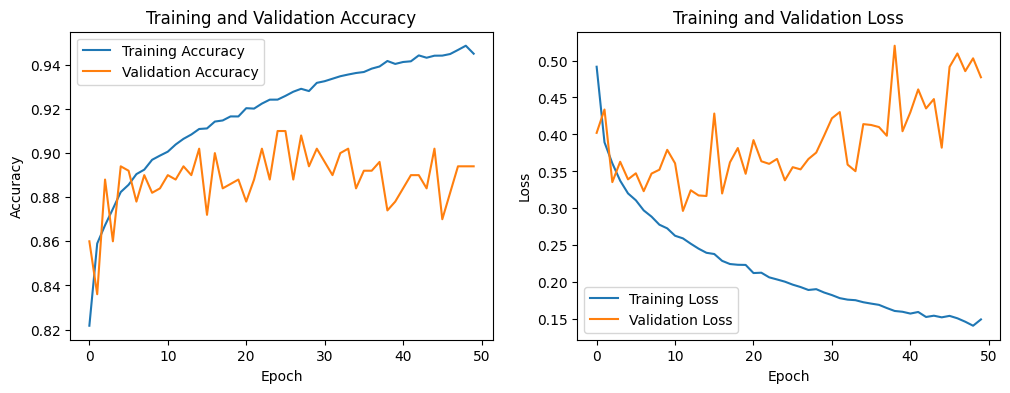

In [31]:
# Plot the learning curves
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
model.save('main_model.h5')
!cp 'main_model.h5' drive/MyDrive/Uni/Pattern/

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
!cp drive/MyDrive/Uni/Pattern/main_model.h5 .
loaded_model = load_model('main_model.h5')

In [123]:
# Create an intermediate model
model_layer = []
for i in range(2):
  model_layer.append(tf.keras.Model(inputs=model.input, outputs=model.layers[i+1].output))

model_layer[1].summary()

cmp_rate = 0.2

cmp_layer_size = [int(cmp_rate * 512), int(cmp_rate * 256)]

compressed_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(cmp_layer_size[0], activation='LeakyReLU'),
    Dense(cmp_layer_size[1], activation='LeakyReLU'),
    Dense(10, activation='softmax')
])
compressed_model.summary()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='flatten_3_input'), name='flatten_3_input', description="created by layer 'flatten_3_input'")
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='flatten_3_input'), name='flatten_3_input', description="created by layer 'flatten_3_input'")


Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3_input (InputLaye  multiple                  0         
 r)                                                              
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               401920    
                                                                 
 dense_10 (Dense)            multiple                  131328    
                                                                 
Total params: 533248 (2.03 MB)
Trainable params: 533248 (2.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_14"
_________________________________________________________________

In [124]:
# Get neuron outputs
neuron_outputs = []
kmeans = []
for i in range(2):
  neuron_outputs.append(model_layer[i].predict(val_images))
  print(neuron_outputs[i].shape)
  # Apply clustering to neuron outputs
  kmeans.append(KMeans(n_clusters=cmp_layer_size[i], random_state=0).fit(neuron_outputs[i].T))

16/16 [==============================] - 0s 2ms/step
(500, 512)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16/16 [==============================] - 0s 4ms/step
(500, 256)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [125]:
w, b = model_layer[1].layers[3].get_weights()
print("target:", w.shape, b.shape)

target: (512, 256) (256,)


In [126]:
neurons_to_keep = []
for i in range(2):
  clusters = kmeans[i].labels_
  unique_neurons = np.unique(clusters)
  neurons_to_keep.append({cluster: np.where(clusters == cluster)[0][0] for cluster in unique_neurons})

  # Get the weights from the original layer
  original_weights, original_biases = model.layers[i+1].get_weights()
  print("original:", original_weights.shape)

  # Filter the weights and biases for the neurons to keep
  new_weights = original_weights[:, list(neurons_to_keep[i].values())]
  if i != 0:
    new_weights = new_weights[list(neurons_to_keep[i-1].values()), :]
  new_biases = original_biases[list(neurons_to_keep[i].values())]
  print("new:", new_weights.shape)

  w, b = compressed_model.layers[i+1].get_weights()
  print("target:", w.shape, b.shape)

  compressed_model.layers[i+1].set_weights([new_weights, new_biases])



# Get the weights from the original layer
original_weights, original_biases = model.layers[3].get_weights()
print("original:", original_weights.shape)

new_weights = original_weights[list(neurons_to_keep[1].values()), :]
print("new:", new_weights.shape)

w, b = compressed_model.layers[3].get_weights()
print("target:", w.shape, b.shape)

compressed_model.layers[3].set_weights([new_weights, original_biases])



compressed_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

original: (784, 512)
new: (784, 102)
target: (784, 102) (102,)
original: (512, 256)
new: (102, 51)
target: (102, 51) (51,)
original: (256, 10)
new: (51, 10)
target: (51, 10) (10,)


In [127]:
# Evaluate the model

test_loss, test_acc = compressed_model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5896 - accuracy: 0.8037 - 442ms/epoch - 1ms/step

Test accuracy: 0.8036999702453613


In [147]:
cmp_rates = [0.99, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.15, 0.1, 0.05, 0.01]
acc_list = []
auc_x = []
auc_y = []

for cmp_rate in cmp_rates:
  cmp_layer_size = [int(cmp_rate * 512), int(cmp_rate * 256)]

  compressed_model = Sequential([
      Flatten(input_shape=(28, 28)),
      Dense(cmp_layer_size[0], activation='LeakyReLU'),
      Dense(cmp_layer_size[1], activation='LeakyReLU'),
      Dense(10, activation='softmax')
  ])

  neuron_outputs = []
  kmeans = []
  for i in range(2):
    neuron_outputs.append(model_layer[i].predict(val_images))
    kmeans.append(KMeans(n_clusters=cmp_layer_size[i], n_init=10, random_state=0, verbose=0).fit(neuron_outputs[i].T))

  neurons_to_keep = []
  for i in range(2):
    clusters = kmeans[i].labels_
    unique_neurons = np.unique(clusters)
    neurons_to_keep.append({cluster: np.where(clusters == cluster)[0][0] for cluster in unique_neurons})

    original_weights, original_biases = model.layers[i+1].get_weights()

    new_weights = original_weights[:, list(neurons_to_keep[i].values())]
    if i != 0:
      new_weights = new_weights[list(neurons_to_keep[i-1].values()), :]
    new_biases = original_biases[list(neurons_to_keep[i].values())]

    compressed_model.layers[i+1].set_weights([new_weights, new_biases])


  original_weights, original_biases = model.layers[3].get_weights()
  new_weights = original_weights[list(neurons_to_keep[1].values()), :]
  compressed_model.layers[3].set_weights([new_weights, original_biases])

  compressed_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  test_loss, test_acc = compressed_model.evaluate(test_images, test_labels, verbose=0)
  acc_list.append(test_acc)
  auc_x.append(1-cmp_rate)
  auc_y.append(test_acc)
  removed_neurons = [512 - cmp_layer_size[0], 256 - cmp_layer_size[1]]
  print(f"\nCompression Rate: {cmp_rate}\nTest Accuracy: {test_acc}\nRemoved Neurons: {removed_neurons}\n")

16/16 [==============================] - 0s 2ms/step

Compression Rate: 0.99
Test Accuracy: 0.8870999813079834
Removed Neurons: [6, 3]

16/16 [==============================] - 0s 2ms/step

Compression Rate: 0.9
Test Accuracy: 0.8870999813079834
Removed Neurons: [52, 26]

16/16 [==============================] - 0s 2ms/step

Compression Rate: 0.8
Test Accuracy: 0.8881999850273132
Removed Neurons: [103, 52]

16/16 [==============================] - 0s 3ms/step

Compression Rate: 0.7
Test Accuracy: 0.8873000144958496
Removed Neurons: [154, 77]

16/16 [==============================] - 0s 2ms/step

Compression Rate: 0.6
Test Accuracy: 0.8870000243186951
Removed Neurons: [205, 103]

16/16 [==============================] - 0s 3ms/step

Compression Rate: 0.5
Test Accuracy: 0.8823000192642212
Removed Neurons: [256, 128]

16/16 [==============================] - 0s 2ms/step

Compression Rate: 0.4
Test Accuracy: 0.8772000074386597
Removed Neurons: [308, 154]

16/16 [===========================

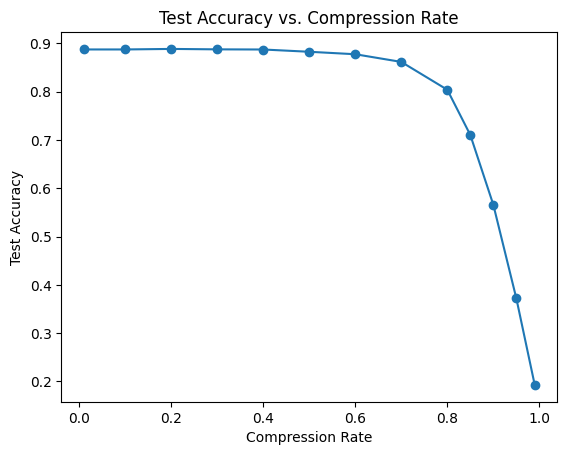

Area Under Curve: 0.7971939986944199


In [148]:
# Plot Accuracy vs. Compression Rate
plt.plot(auc_x, auc_y, marker='o')
plt.xlabel('Compression Rate')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Compression Rate')
plt.show()

# Calculate and print the area under the curve
area_under_curve = auc(auc_x, auc_y)
print(f"Area Under Curve: {area_under_curve}")